In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
outpath='HAT-264-0000781.rlc.tfalc'
data=Table.read(outpath,format='ascii')
t=data['col2']
mag=data['col8']

Text(0.5, 0, 'time (BJD-2454833)')

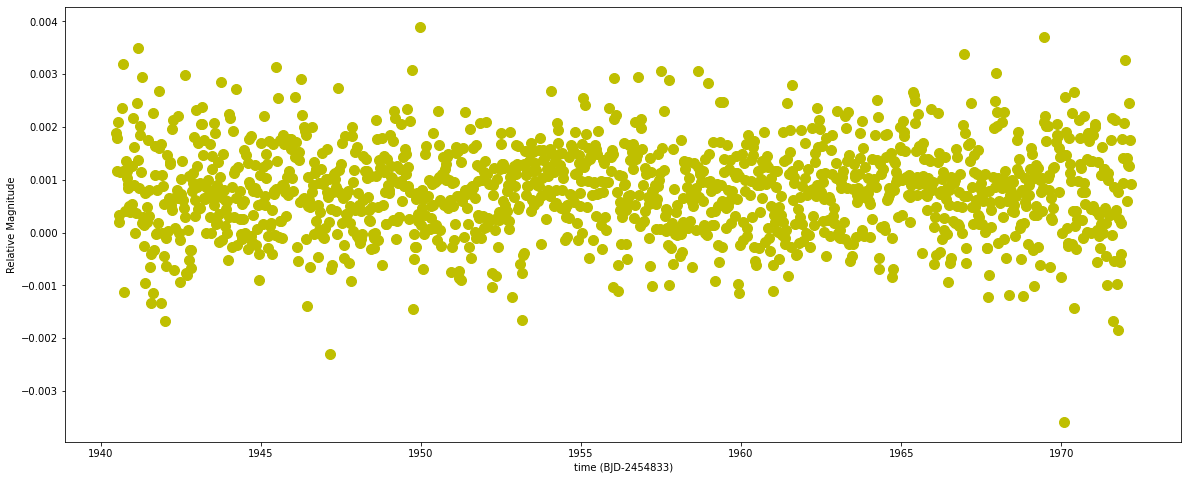

In [3]:
plt.figure(figsize=(20,8))
plt.plot(t,mag,'yo',markersize=10,label='HAT-264-0000781')
plt.ylabel('Relative Magnitude')
plt.xlabel('time (BJD-2454833)')

In [4]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200817 14:03:12 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200817 14:03:12 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


In [5]:
dates=data['col2']
fluxes=data['col8']
errs=fluxes*0.01

In [6]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs)

[I 200817 14:03:14 zgls:597] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200817 14:03:14 zgls:607] using 6 workers...


In [7]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs)

[I 200817 14:03:17 nonphysical:216] spline fit done. nknots = 13,  chisq = 13199195.47876, reduced chisq = 9712.43229
[I 200817 14:03:17 png:696] plotting phased LC with period 0.100411, epoch 1943.99181
[I 200817 14:03:18 nonphysical:216] spline fit done. nknots = 13,  chisq = 13477691.17681, reduced chisq = 9917.35922
[I 200817 14:03:18 png:696] plotting phased LC with period 0.050205, epoch 1957.49712
[I 200817 14:03:18 nonphysical:216] spline fit done. nknots = 13,  chisq = 13123784.91831, reduced chisq = 9656.94254
[I 200817 14:03:18 png:696] plotting phased LC with period 0.200821, epoch 1940.47757
[I 200817 14:03:18 nonphysical:216] spline fit done. nknots = 13,  chisq = 13309491.22312, reduced chisq = 9793.59178
[I 200817 14:03:18 png:696] plotting phased LC with period 0.701097, epoch 1951.69453
[I 200817 14:03:18 nonphysical:216] spline fit done. nknots = 13,  chisq = 13204036.68017, reduced chisq = 9715.99461
[I 200817 14:03:18 png:696] plotting phased LC with period 0.11448

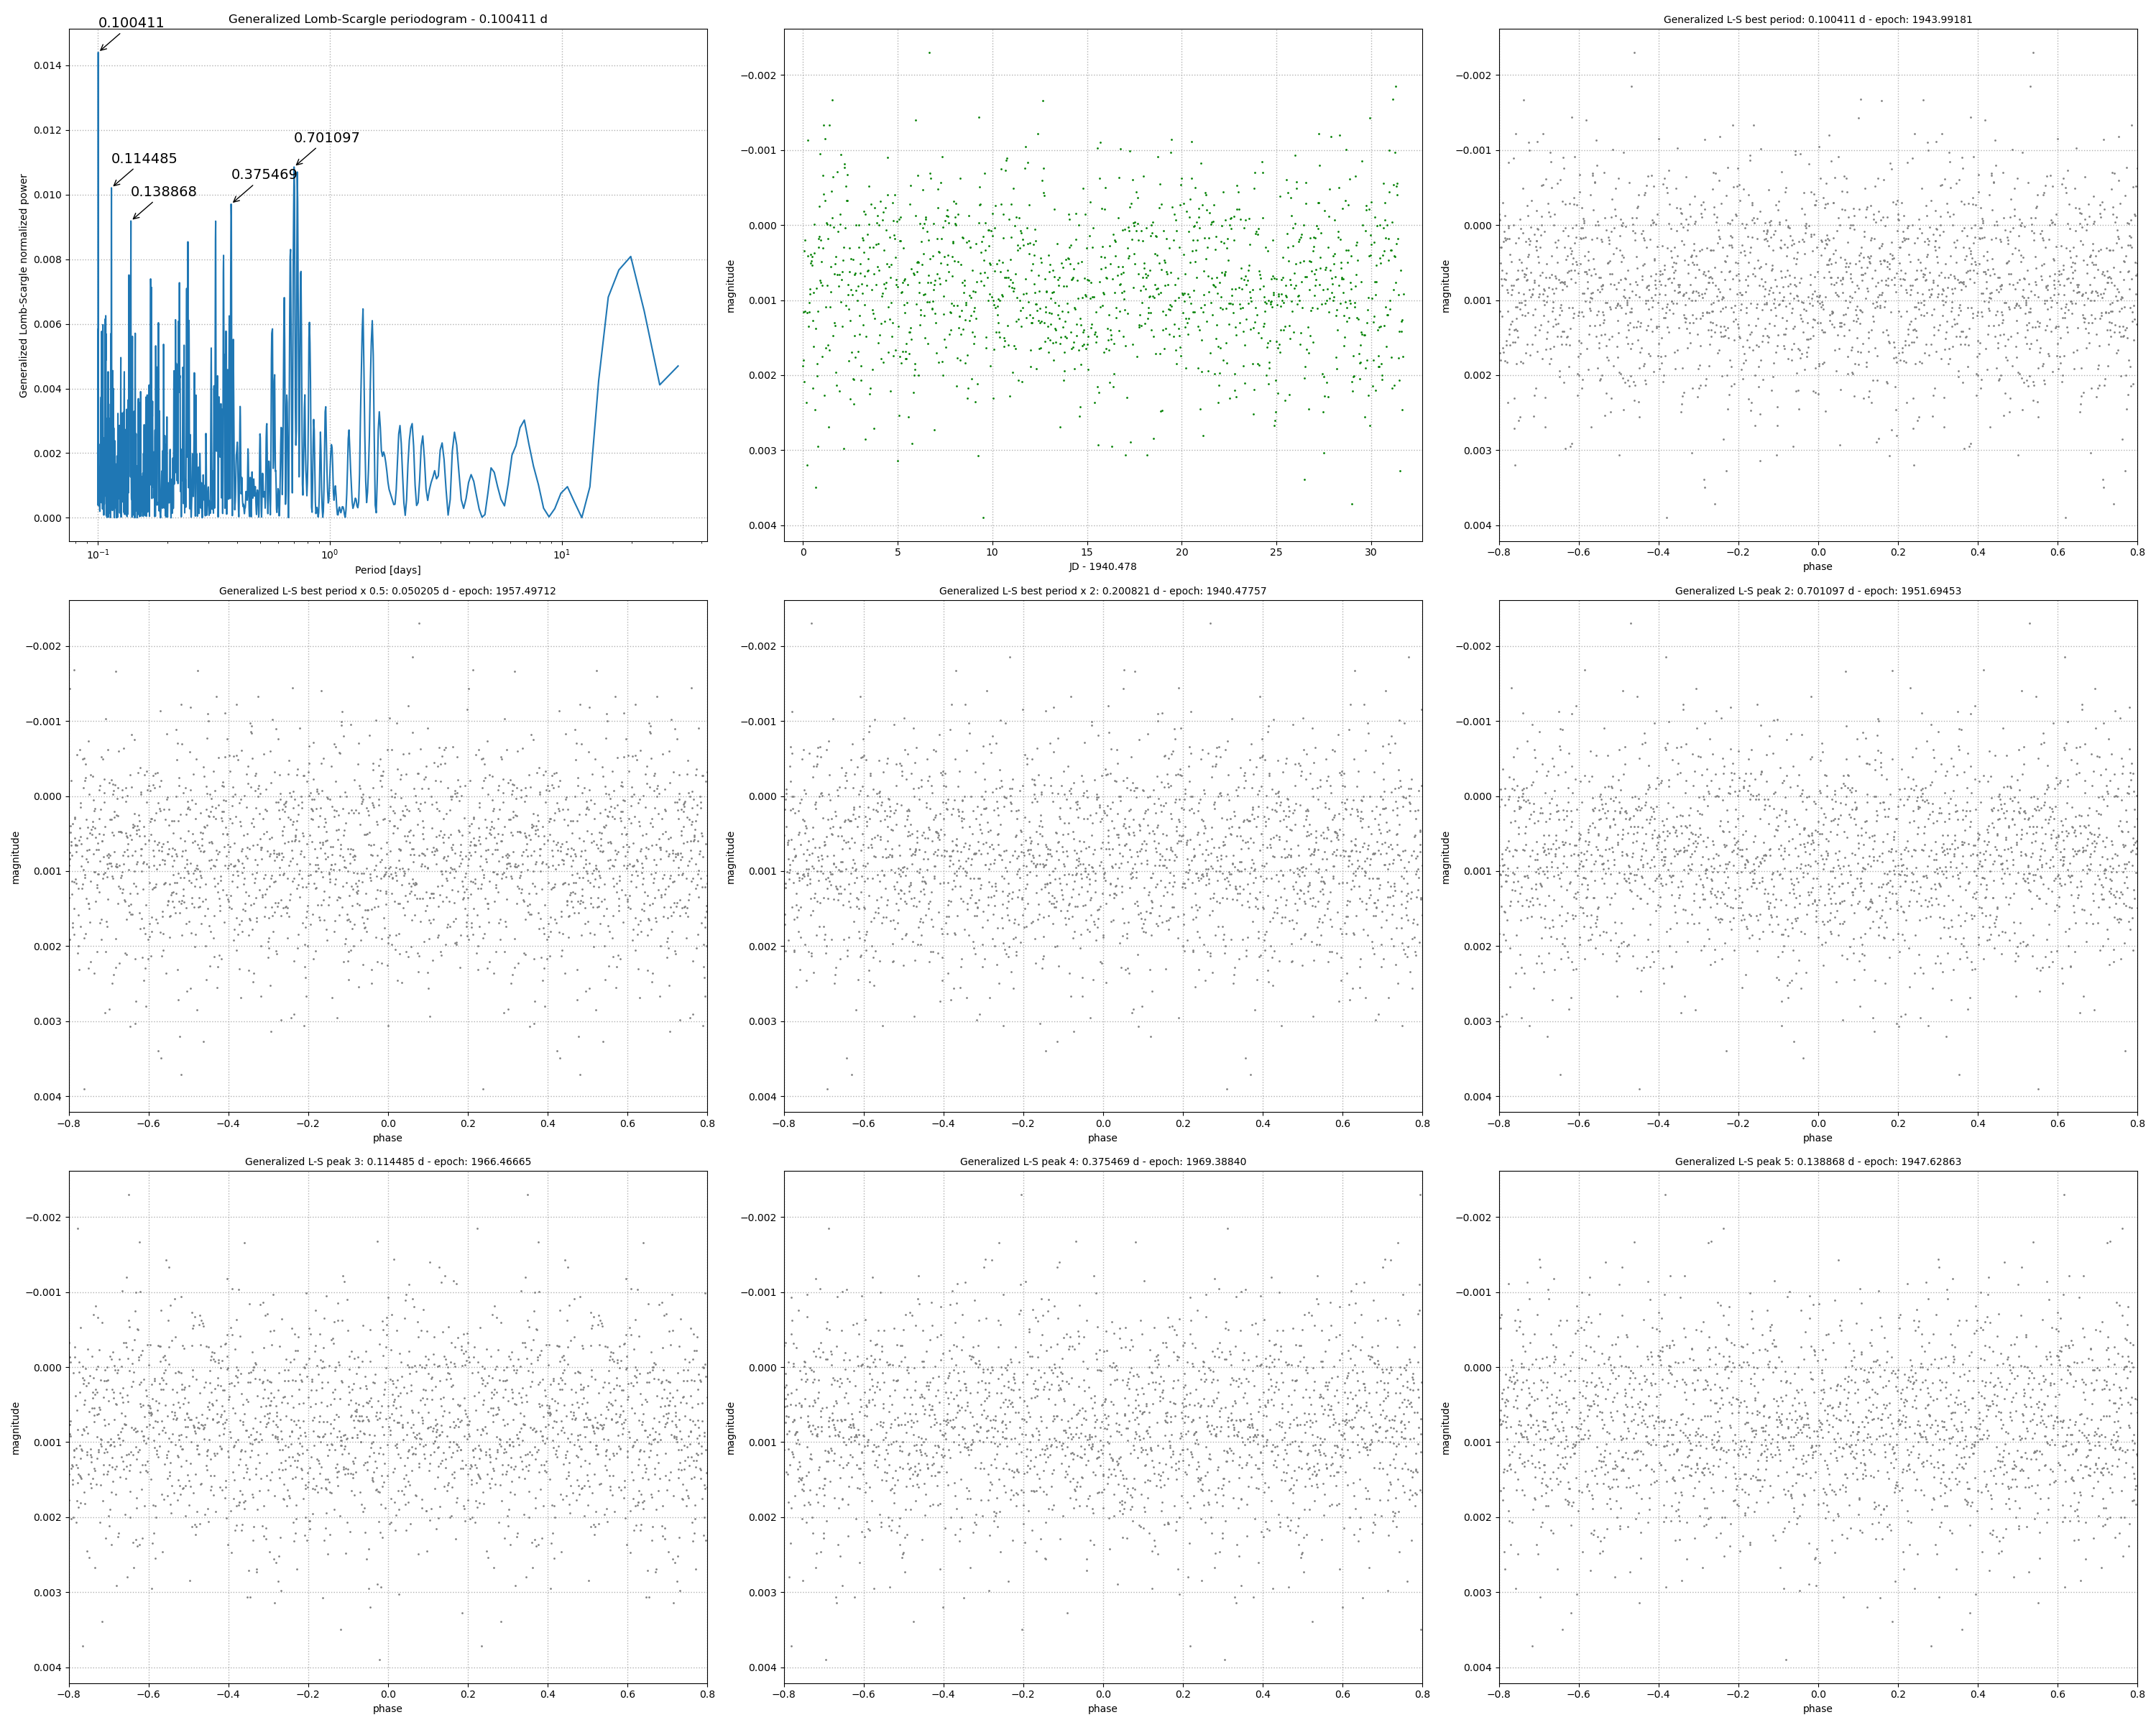

In [8]:
from IPython.display import Image
Image('0000781-checkplot-glsp.png')

In [9]:
glsp

{'bestperiod': 0.10041053285804828,
 'bestlspval': 0.014400657477294434,
 'nbestpeaks': 5,
 'nbestlspvals': [0.014400657477294434,
  0.01085405761899193,
  0.01020979254541037,
  0.009705797816696487,
  0.009183524128417485],
 'nbestperiods': [0.10041053285804828,
  0.7010965524336291,
  0.11448541968930649,
  0.3754687697867303,
  0.1388675029360212],
 'lspvals': array([0.00469841, 0.00411356, 0.00639838, ..., 0.00039009, 0.00285933,
        0.0058361 ]),
 'omegas': array([ 0.19827301,  0.23792761,  0.27758222, ..., 62.7335807 ,
        62.7732353 , 62.8128899 ]),
 'periods': array([31.68956417, 26.40797014, 22.63540298, ...,  0.10015665,
         0.10009338,  0.10003019]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [10]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [0.10041053285804828, 0.7010965524336291, 0.11448541968930649, 0.3754687697867303, 0.1388675029360212] (days)


In [11]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs)

[I 200817 14:04:16 abls:919] min P: 0.1, max P: 100.0, nfreq: 126632, minfreq: 0.01, maxfreq: 10.0
[I 200817 14:04:16 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 7.889032447996576e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[W 200817 14:04:16 abls:964] the requested max P = 100.000 is larger than the time base of the observations = 31.690,  will make minfreq = 2 x 1/timebase
[W 200817 14:04:16 abls:969] new minfreq: 0.06311225958397261, maxfreq: 10.0
[I 200817 14:04:16 abls:980] using 6 workers...
[I 200817 14:04:16 abls:1090] worker 1: minfreq = 0.063112, nfreqs = 21105
[I 200817 14:04:16 abls:1090] worker 2: minfreq = 1.728093, nfreqs = 21105
[I 200817 14:04:16 abls:1090] worker 3: minfreq = 3.393073, nfreqs = 21105
[I 200817 14:04:16 abls:1090] worker 4: minfreq = 5.058053, nfreqs = 21105
[I 200817 14:04:16 abls:1090] worker 5: minfreq = 6.723033, nfreqs = 21105
[I 200817 14:04:16 abls:1090] worker 6: minfreq = 8.388014, nfreq

In [12]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs)

[W 200817 14:04:28 png:1142] no best period found for this object, skipping...


In [14]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs)

[I 200817 14:04:32 spdm:337] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200817 14:04:32 spdm:349] using 6 workers...


In [15]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs)

[I 200817 14:04:37 nonphysical:216] spline fit done. nknots = 13,  chisq = 13492884.45776, reduced chisq = 9928.53897
[I 200817 14:04:37 png:696] plotting phased LC with period 5.658851, epoch 1940.47757
[I 200817 14:04:37 nonphysical:216] spline fit done. nknots = 13,  chisq = 13314094.59065, reduced chisq = 9796.97910
[I 200817 14:04:37 png:696] plotting phased LC with period 2.829425, epoch 1948.97712
[I 200817 14:04:37 nonphysical:216] spline fit done. nknots = 13,  chisq = 13502921.19468, reduced chisq = 9935.92435
[I 200817 14:04:37 png:696] plotting phased LC with period 11.317701, epoch 1940.47757
[I 200817 14:04:37 nonphysical:216] spline fit done. nknots = 13,  chisq = 13420474.46140, reduced chisq = 9875.25715
[I 200817 14:04:37 png:696] plotting phased LC with period 0.861129, epoch 1946.50489
[I 200817 14:04:37 nonphysical:216] spline fit done. nknots = 13,  chisq = 13368528.44410, reduced chisq = 9837.03344
[I 200817 14:04:37 png:696] plotting phased LC with period 1.2987

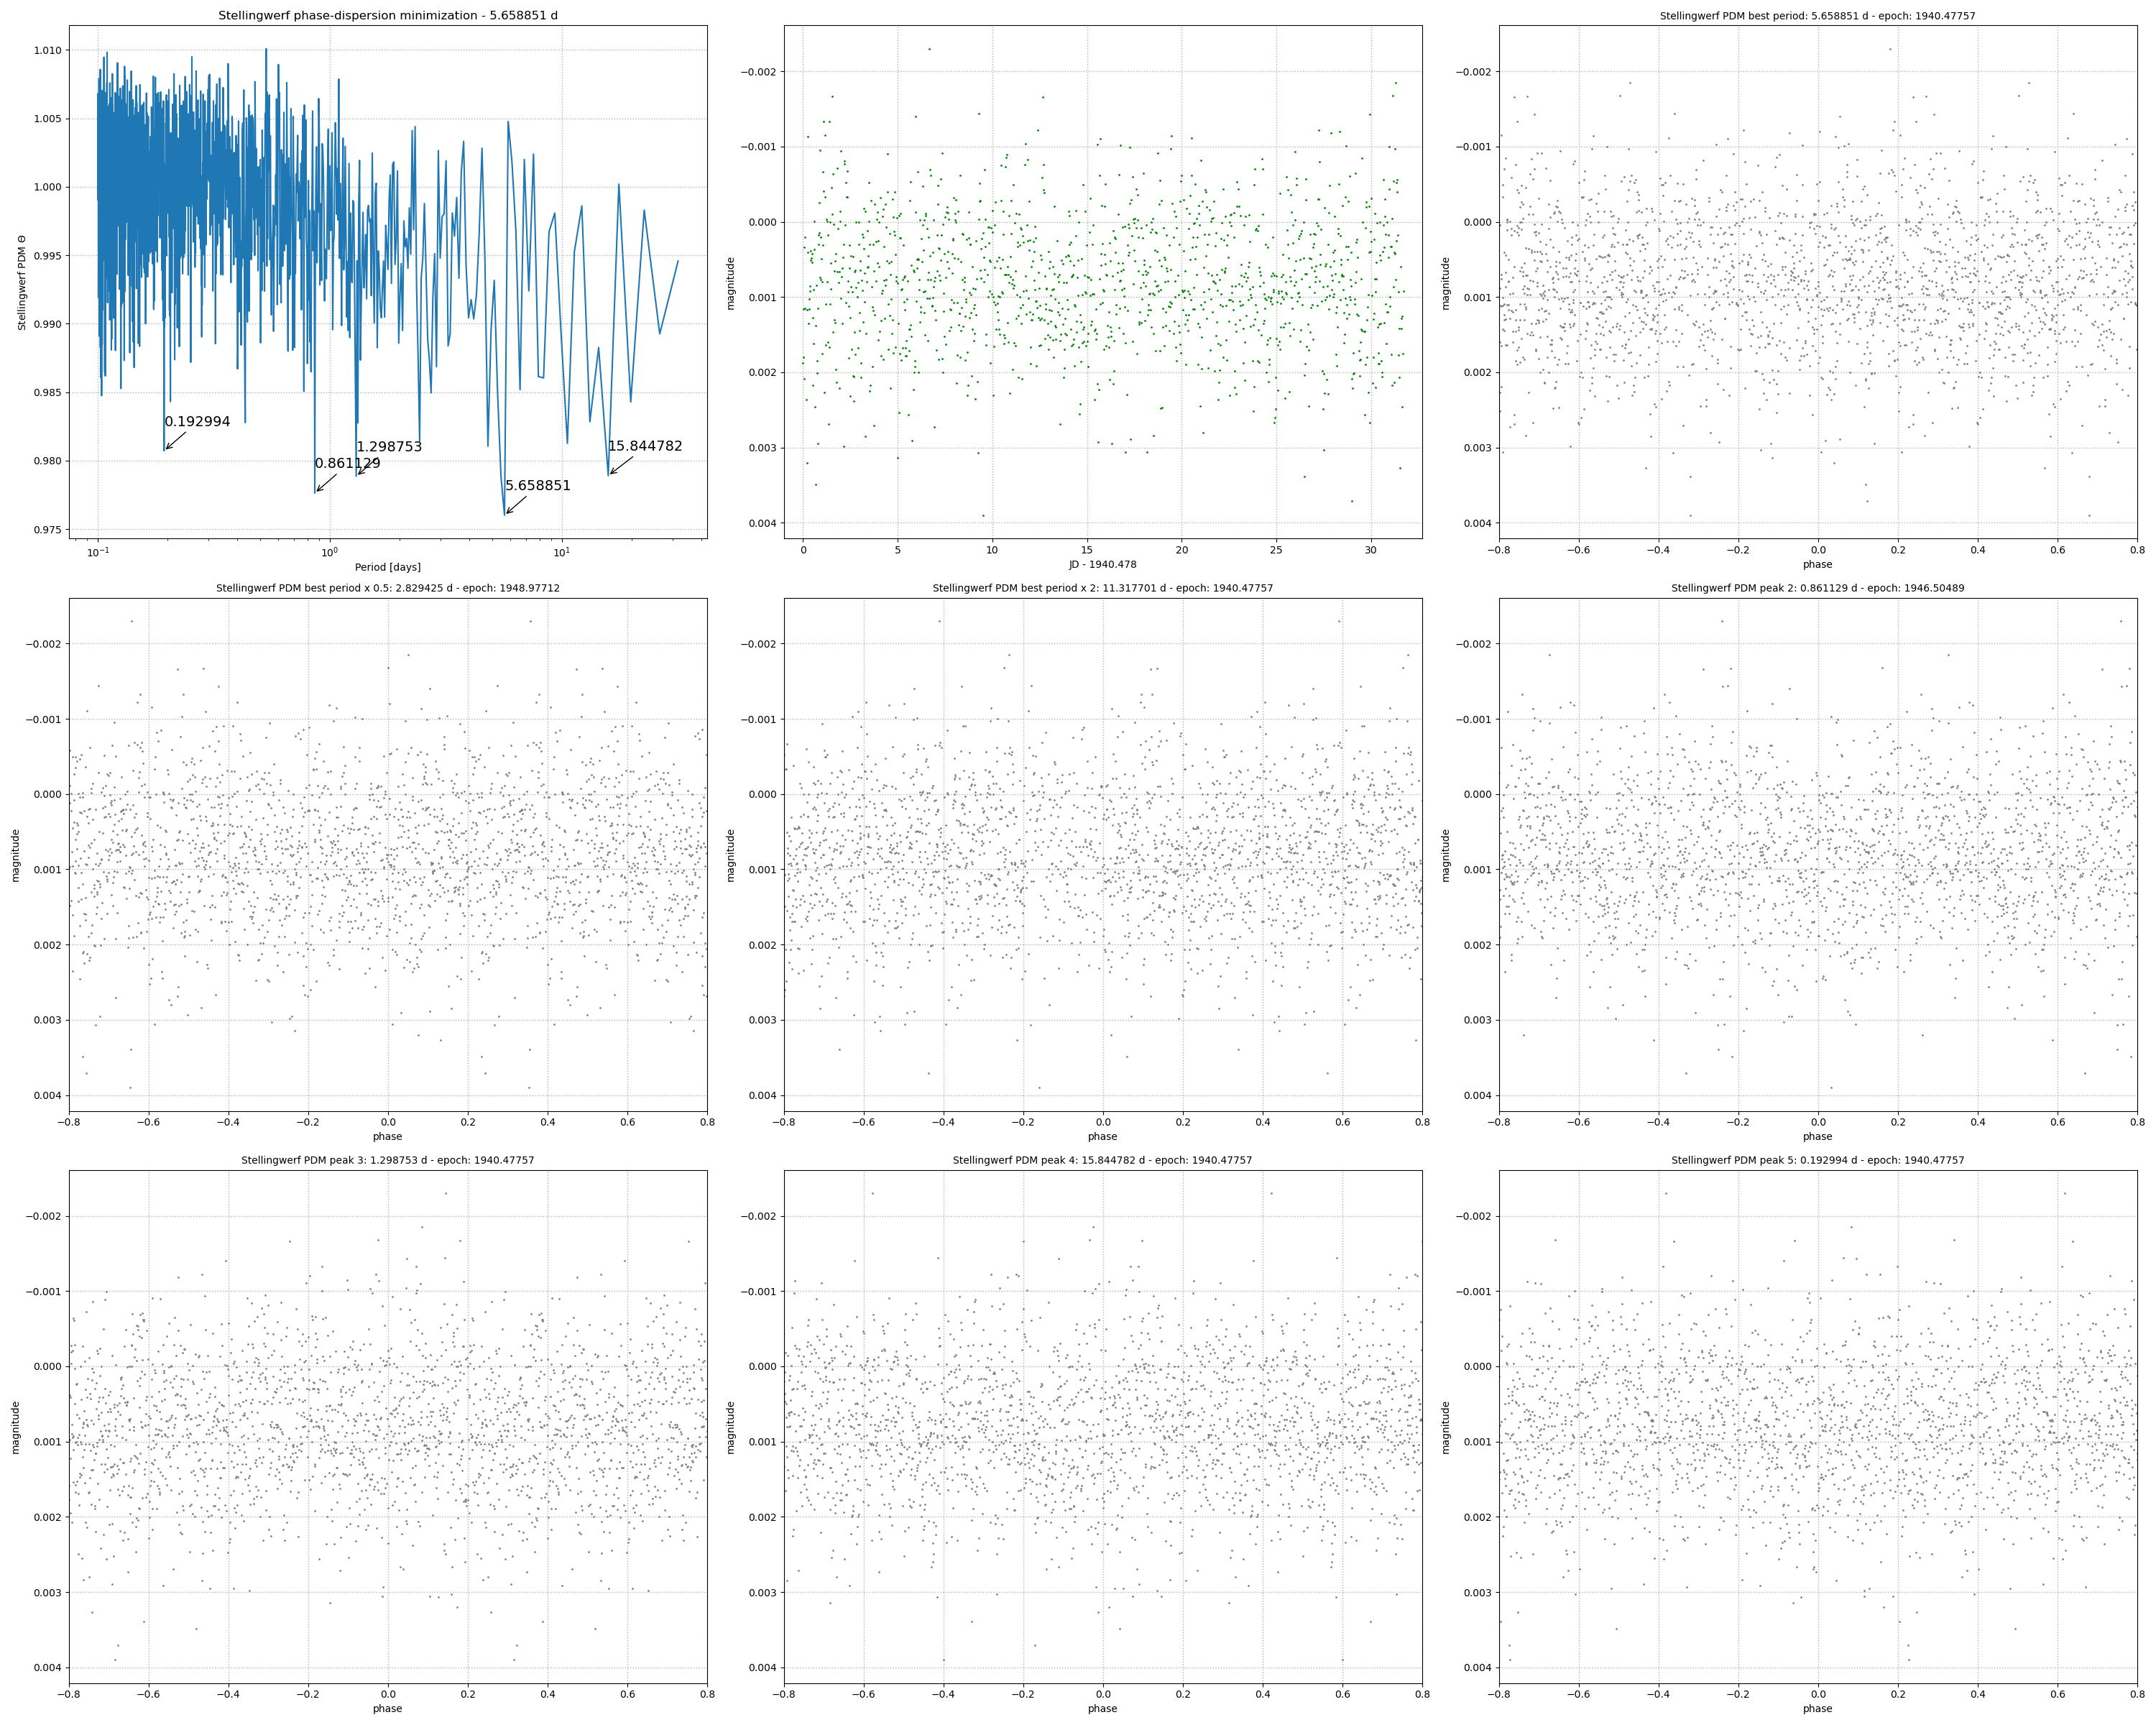

In [16]:
Image('0000781-checkplot-spdm.png')

In [17]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [5.658850744642864, 0.8611294611413054, 1.2987526299180343, 15.84478208500002, 0.19299369165651667] (days)
